# Tips Dataset

+ https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql
+ https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv
+ SQL equivalent: SELECT / WHERE / GROUPBY / JOIN / UPDATE / DELETE

---

##### 1. Import Packages

In [1]:
import pandas as pd
import numpy as np

#!pip install pandas
#!pip install xlrd

In [2]:
##### 2. Read dataurl = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv'
url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv'
filename_csv = 'tips.csv'
filename_xlsx = 'tips.xlsx'

# read csv file
# tips = pd.read_csv(filename_csv) 

# read excel file: require xlrd package
tips = pd.read_excel(filename_xlsx)  # require xlrd


# max display rows
pd.set_option('display.max_rows', 50) 
tips.head(5)
# tips.tail()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# type(tips) # it is a DataFrame

# tips.shape
# tips.index
# tips.columns

# tips.count()
# tips.query('total_bill>10')



## 1. <font color=blue>SELECT</font>

>SELECT total_bill, tip, smoker, time<br>
>FROM tips<br>
>LIMIT 5;<br>

In [4]:
# tips[['total_bill', 'tip', 'smoker', 'time']].head(5) # using fancy index
# tips.filter(['total_bill', 'tip', 'smoker', 'time'], axis='columns').head(5) # using filter()
# tips.loc[:, ['total_bill', 'tip', 'smoker', 'time']].head(5) # using loc indexer (label)
# tips.iloc[:, [0,1,3,5]].head(5) # using iloc indexer (position)

## <font color=blue>SELECT</font> with new column

> SELECT *, tip/total_bill as tip_rate<br>
> FROM tips<br>
> LIMIT 5;<br>

In [5]:
tips['tip_rate'] = tips['tip'] / tips['total_bill']
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


## 2. <font color=blue>WHERE</font>

> SELECT *<br>
> FROM tips<br>
> WHERE time = 'Dinner'<br>
> LIMIT 5;<br>

In [6]:
# tips.time.value_counts()

# tips[tips.time=='Dinner'].head(5) # boolean mask (double equal signs)
# tips.time=='Dinner' # it's a mask

tips.query('time=="Dinner"').head(5) # query() (double equal signs, if it is negative use !=)


,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


> SELECT *<br>
> FROM tips<br>
> WHERE time = 'Dinner' AND tip > 5.00;<br>

In [7]:
# tips[tips.time=='Dinner' & tips.tip>5] # warning: this DON'T work!, for multiple conditions must use ()

# correct
# tips[(tips.time=='Dinner') & (tips.tip>5)]
tips.query('time=="Dinner" & tip>5')

,total_bill,tip,sex,smoker,day,time,size,tip_rate
23,39.42,7.58,Male,No,Sat,Dinner,4,0.192288
44,30.40,5.60,Male,No,Sun,Dinner,4,0.184211
47,32.40,6.00,Male,No,Sun,Dinner,4,0.185185
52,34.81,5.20,Female,No,Sun,Dinner,4,0.149382
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
116,29.93,5.07,Male,No,Sun,Dinner,4,0.169395
155,29.85,5.14,Female,No,Sun,Dinner,5,0.172194
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
181,23.33,5.65,Male,Yes,Sun,Dinner,2,0.242177


>SELECT *<BR>
>FROM tips<BR>
>WHERE size >= 5 OR total_bill > 45;<BR>

In [8]:
# tips[(tips['size']>=5) | (tips['total_bill']>45)] 
tips.query('size>=5 | total_bill>45')

,total_bill,tip,sex,smoker,day,time,size,tip_rate
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
125,29.80,4.20,Female,No,Thur,Lunch,6,0.140940
141,34.30,6.70,Male,No,Thur,Lunch,6,0.195335
142,41.19,5.00,Male,No,Thur,Lunch,5,0.121389
143,27.05,5.00,Female,No,Thur,Lunch,6,0.184843
155,29.85,5.14,Female,No,Sun,Dinner,5,0.172194
156,48.17,5.00,Male,No,Sun,Dinner,6,0.103799
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
182,45.35,3.50,Male,Yes,Sun,Dinner,3,0.077178
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663


## 3. <font color=blue>NULL</font> handing

> SELECT *<br>
> FROM tips<br>
> WHERE time IS NULL;<br>


In [9]:
# tips[tips['time'].isna()]  
# tips[tips['time'].isnull()]

# tips[tips['time'].notna()] # negative check: notna()


## 4. <font color=blue>GROUPBY</font>

>SELECT sex, count(*)<br>
>FROM tips<br>
>GROUP BY sex;<br>


In [10]:
tips.groupby('sex').size() 

sex
Female     87
Male      157
dtype: int64

> SELECT day, AVG(tip), COUNT(*)<br>
> FROM tips<br>
> GROUP BY day;<br>

In [11]:
# tips.groupby('day').agg('mean') # not all fields require means
# tips.groupby('day').agg({'tip':'mean'}) # avg(tip) is okay, but count is missing
tips.groupby('day').agg({'tip':'mean', 'day':'size'})

,tip,day
day,,
Fri,2.734737,19
Sat,2.993103,87
Sun,3.255132,76
Thur,2.771452,62


> SELECT smoker, day, COUNT(*), AVG(tip)<br>
> FROM tips<br>
> GROUP BY smoker, day;<br>

In [12]:
tips.groupby(['smoker', 'day']).agg({'tip':'mean', 'day':'size'})

tip  day
smoker day                
No     Fri   2.812500    4
       Sat   3.102889   45
       Sun   3.167895   57
       Thur  2.673778   45
Yes    Fri   2.714000   15
       Sat   2.875476   42
       Sun   3.516842   19
       Thur  3.030000   17

## 5. <font color=blue>JOIN</font>

In [13]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value': np.random.randn(4)})
df1

,key,value
0,A,-0.301807
1,B,-1.246573
2,C,-0.838358
3,D,-1.023489


In [14]:
df2 = pd.DataFrame({'key': ['B', 'D', 'D', 'E'], 'value': np.random.randn(4)})
df2

,key,value
0,B,0.041653
1,D,0.047820
2,D,1.070161
3,E,0.375066


> SELECT *<br>
> FROM df1<br>
> WHERE <br>
>   df1.key = df2.key;<br>

In [15]:
# WARNING: it's pd.merge, NOT df1.merge!

pd.merge(df1, df2, on='key', how='inner') # inner (intersection only, default)
# pd.merge(df1, df2, on='key', how='outer') # outer (union)


,key,value_x,value_y
0,B,-1.246573,0.041653
1,D,-1.023489,0.047820
2,D,-1.023489,1.070161


## <font color=blue>LEFT JOIN / RIGHT JOIN</font>

+ LEFT JOIN: keep keys (on) from left table 
+ RIGHT JOIN: keep keys (on) from right table
> SELECT *<BR>
> FROM df1<BR>
> LEFT OUTER JOIN df2<BR>
>   ON df1.key = df2.key;<BR>

In [16]:
# pd.merge(df1, df2, on='key', how='left') # left join 
# pd.merge(df1, df2, on='key', how='right') # right join 

## 6. <font color=blue>UNION</font>

In [17]:
df1 = pd.DataFrame({'city': ['Chicago', 'San Francisco', 'New York City'], 'rank': range(1, 4)})
df2 = pd.DataFrame({'city': ['Chicago', 'Boston', 'Los Angeles'], 'rank': [1, 4, 5]})

df1

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3


In [18]:
df2

,city,rank
0,Chicago,1
1,Boston,4
2,Los Angeles,5


In [19]:
# warning: it's pd.concat([]), NOT df.concat!

# pd.concat([df1,df2])
# pd.concat([df1,df2,df1])
pd.concat([df1,df2]).drop_duplicates() # remove chicago (repeated)

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
1,Boston,4
2,Los Angeles,5


## 7. <font color=blue>UPDATE</font>

> UPDATE tips<br>
> SET tip = tip*2<br>
> WHERE tip < 4;<br>

In [20]:
# method 1
# mask = tips.tip < 4
# tips.loc[mask, 'tip'] *=2

# method 2
# update using map()
# def changeTip(tip):
#     if tip < 8:
#         return tip*2
#     else:
#         return tip

# tips.tip = tips.tip.map(changeTip)
# tips

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,2.02,Female,No,Sun,Dinner,2,0.059447
1,10.34,3.32,Male,No,Sun,Dinner,3,0.160542
2,21.01,7.00,Male,No,Sun,Dinner,3,0.166587
3,23.68,6.62,Male,No,Sun,Dinner,2,0.139780
4,24.59,7.22,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,11.84,Male,No,Sat,Dinner,3,0.203927
240,27.18,4.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,4.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,3.50,Male,No,Sat,Dinner,2,0.098204


## 8. <font color=blue>DELETE</font>

> DELETE FROM tips <BR>
> WHERE tip > 9; <BR>

In [24]:
tips = tips[tips.tip<=9]
tips
# tips[tips.tip>9] # what we need to keep
# tips[tips.tip<=9] # what we need to delete

# tips = tips[tips.tip<=9]
# tips = tips.loc[tips.tip<=9]

# tips


,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,2.02,Female,No,Sun,Dinner,2,0.059447
1,10.34,3.32,Male,No,Sun,Dinner,3,0.160542
2,21.01,7.00,Male,No,Sun,Dinner,3,0.166587
3,23.68,6.62,Male,No,Sun,Dinner,2,0.139780
4,24.59,7.22,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
237,32.83,2.34,Male,Yes,Sat,Dinner,2,0.035638
240,27.18,4.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,4.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,3.50,Male,No,Sat,Dinner,2,0.098204


## 9. Save DataFrame to a File


In [26]:
# Save to file

# tips.to_csv('modified.csv')
# tips.to_excel('modified.xlsx') # xlrd

## 10. Plot graph

<AxesSubplot:>

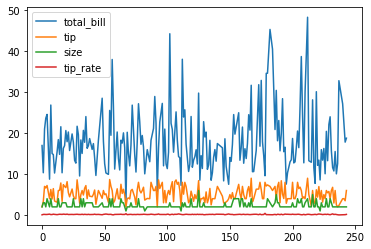

In [27]:
tips.plot()